# Clone repo, dl dataset and install dependencies

In [ ]:
!git clone https://github.com/ultralytics/yolov5 # clone repo
!python3 -c "from yolov5.utils.google_utils import gdrive_download; gdrive_download('1n_oKgR81BJtqk75b00eAjdv03qVCQn2f','coco128.zip')" # download dataset
%cd yolov5
!pip install -qr requirements.txt  # install dependencies

In [1]:
%cd yolov5

/home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5


# Train on custom data

### Create dataset yaml

Need to create a yaml file with:

- train, val, test dataset paths (either as 1) directory: path/images/, 2) file: path/images.txt, or 3) list: [path1/images/, path2/images/]
- nb of classes
- class names

Below a file example of how the yaml should be structured:

```
train: ../coco128/images/train2017/
val: ../coco128/images/train2017/

nc: 80

names: ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 
        'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 
        'teddy bear', 'hair drier', 'toothbrush']    
```

### Create labels

Need to use a tool like Labelbox or CVAT to create labels file. The labels need to be in darknet format, that is a ```*.txt``` file for each image. If an image doesn't contain any objects, then there is no need for a label file for that image.  

Each ```*.txt``` file needs to be structured with:

- one row per object
- 5 entries per row: class, x_center, y_center, width, height
- bb coordinates must be normalized between 0-1. To normalize pixel values, need to divide x_center and width by the image width, and y_center and height by the image height
- class indexes start at 0

The example provided for an image-label pair:

```
dataset/images/train2017/000000109622.jpg  # image
dataset/labels/train2017/000000109622.txt  # label
```

A ```*.txt``` label file should look like this if there are 2 objects in the corresponding image:

```
0 0.550453 0.514734 0.124398 0.358212
1 0.387654 0.419909 0.069201 0.103472
```

### Directories

Directories must be "next to each other". That is, in this example with the coco128 dataset, the ```/coco128``` dir has to be next to the ```/yolov5``` dir. Similarly, the ```coco128/labels``` has to be next to the ```coco128/images``` dir.

### Training

Need to:

- 1: Select a model (eg. yolov5s.yaml, yolov5m.yaml, yolov5l.yaml, yolov5x.yaml)
- 2: Change the number of classes (```nc```) if not training on the COCO dataset (adapt to required nb of classes)
- 3: Define max img width with ```--img```
- 4: Define batch size with ```--batch```
- 5: Define epochs with ```--epochs```
- 6: Define dataset config yaml with ```--data```
- 7: Define model config yaml with ```--cfg```
- 8: Define pretrained weights with ```--weights```, if training from scratch then pass ```''```

Training results are saved in the ```/runs/exp*``` folder.

In [2]:
# Train YOLOv5s on coco128 for 5 epochs
! python train.py --img 640 --batch 16 --epochs 5 --data ./data/coco128.yaml --cfg ./models/yolov5s.yaml --weights yolov5s.pt

Using CPU

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='./models/yolov5s.yaml', data='./data/coco128.yaml', device='', epochs=5, evolve=False, global_rank=-1, hyp='data/hyp.finetune.yaml', img_size=[640, 640], local_rank=-1, logdir='runs/', multi_scale=False, name='', noautoanchor=False, nosave=False, notest=False, rect=False, resume=False, single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', world_size=1)
Start Tensorboard with "tensorboard --logdir runs/", view at http://localhost:6006/
Hyperparameters {'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.5, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.5, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mixup': 0.0}

                 from  n    params  module                                  arguments          

### Visualize training images, labels and augmentations

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import glob

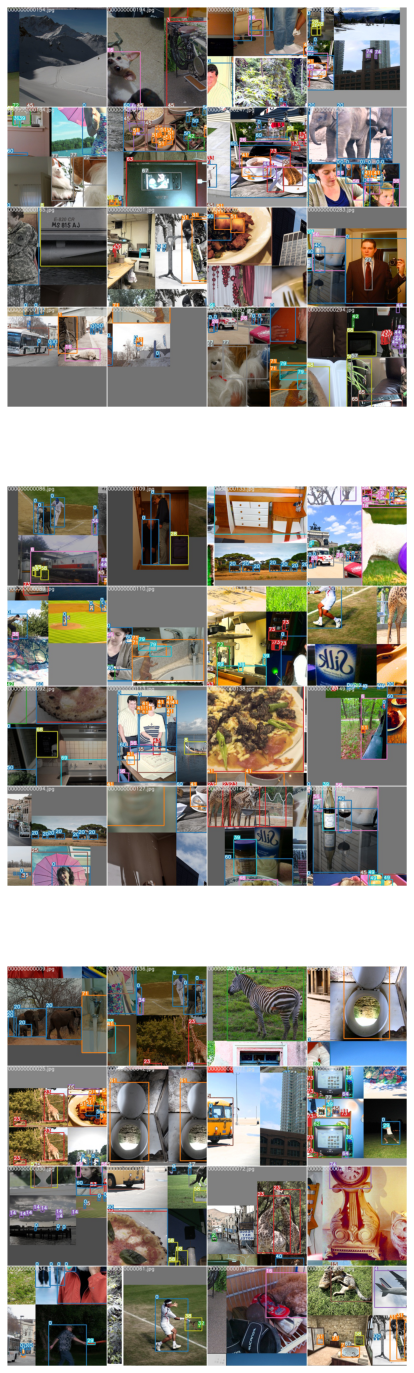

In [4]:
images = glob.glob('./runs/exp0/train*.jpg')

fig, axs = plt.subplots(len(images), 1, figsize=(25,25))

for i, ax in enumerate(axs.flat):
    img = Image.open(images[i])
    ax.imshow(img)
    ax.axis('off')

plt.show()

### Visualize ground truth labels

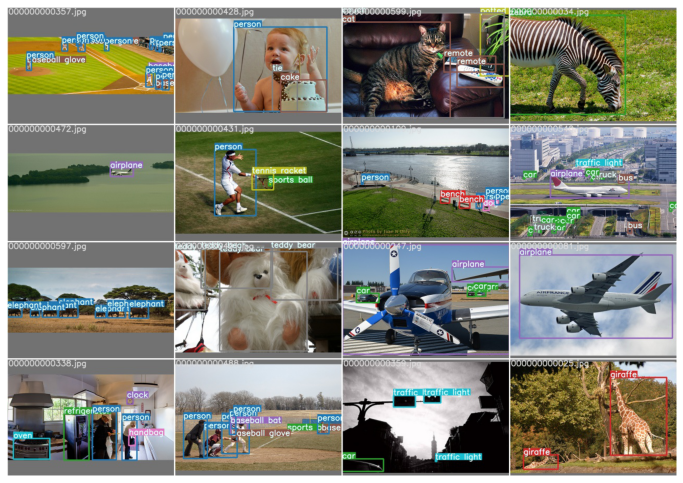

In [5]:
fig, ax = plt.subplots(figsize=(12,12))
img = Image.open('./runs/exp0/test_batch0_gt.jpg')
ax.imshow(img)
ax.axis('off')
plt.show()

### Test predictions

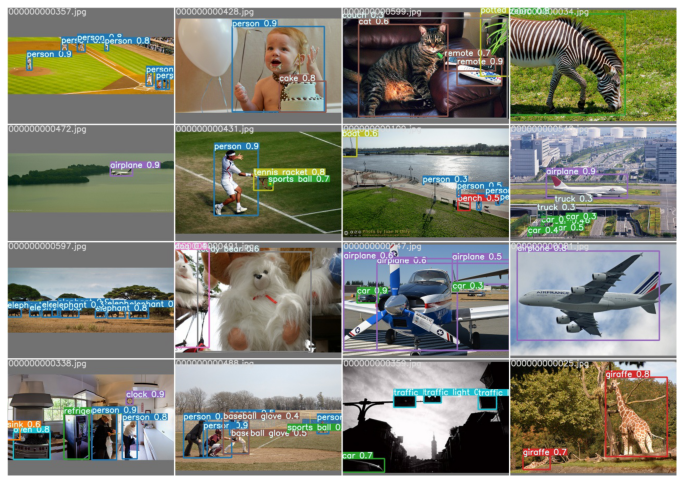

In [6]:
fig, ax = plt.subplots(figsize=(12,12))
img = Image.open('./runs/exp0/test_batch0_pred.jpg')
ax.imshow(img)
ax.axis('off')
plt.show()

### Visualize Training Results

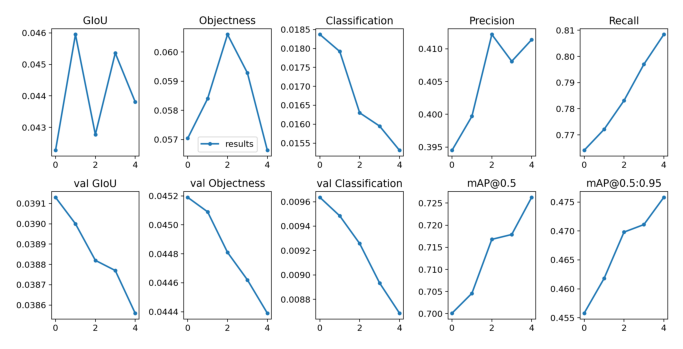

In [7]:
fig, ax = plt.subplots(figsize=(12,12))
img = Image.open('./runs/exp0/results.png')
ax.imshow(img)
ax.axis('off')
plt.show()

# Inference

In [8]:
import torch
from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

clear_output()

#### With pretrained weights

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='inference/images/', update=False, view_img=False, weights=['yolov5s.pt'])
Using CPU

Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 6.61683e+06 gradients
image 1/2 /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/images/bus.jpg: 416x352 3 persons, 1 buss, Done. (0.079s)
image 2/2 /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/images/zidane.jpg: 288x416 3 persons, 1 ties, Done. (0.068s)
Results saved to inference/output
Done. (0.211s)


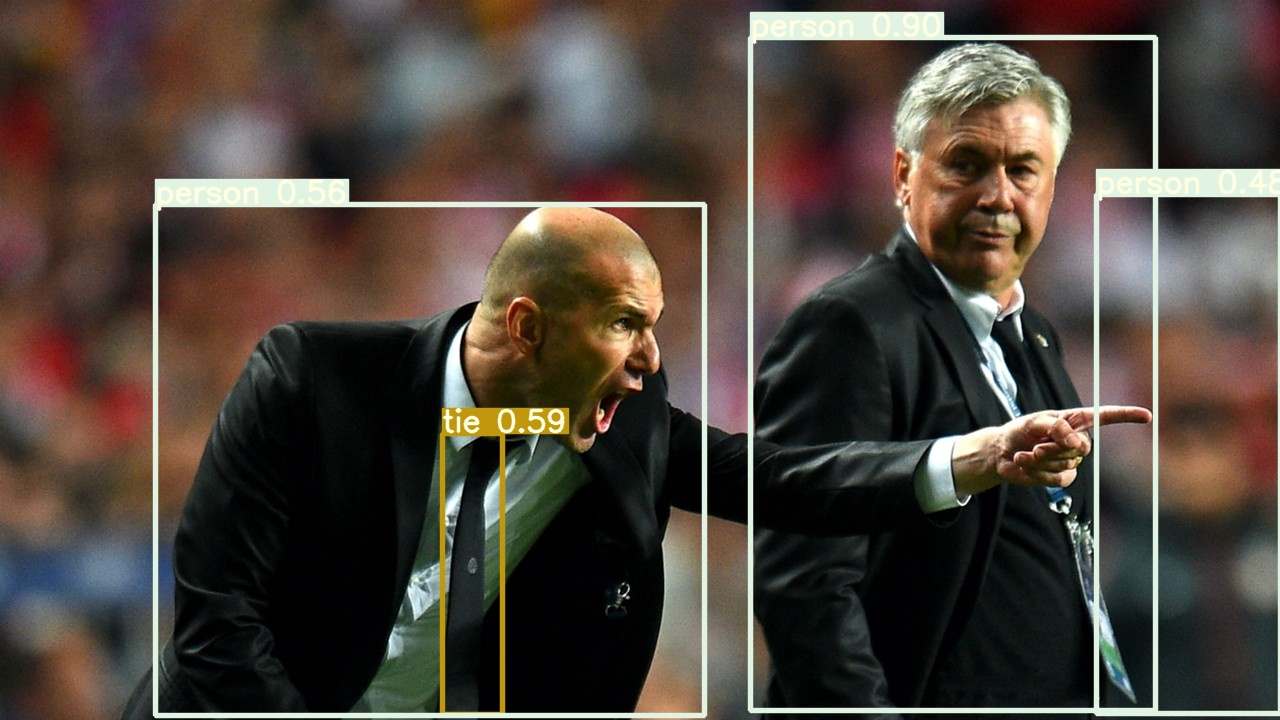

In [9]:
!python detect.py --weights yolov5s.pt --img 416 --conf 0.4 --source inference/images/
Image(filename='inference/output/zidane.jpg', width=600)

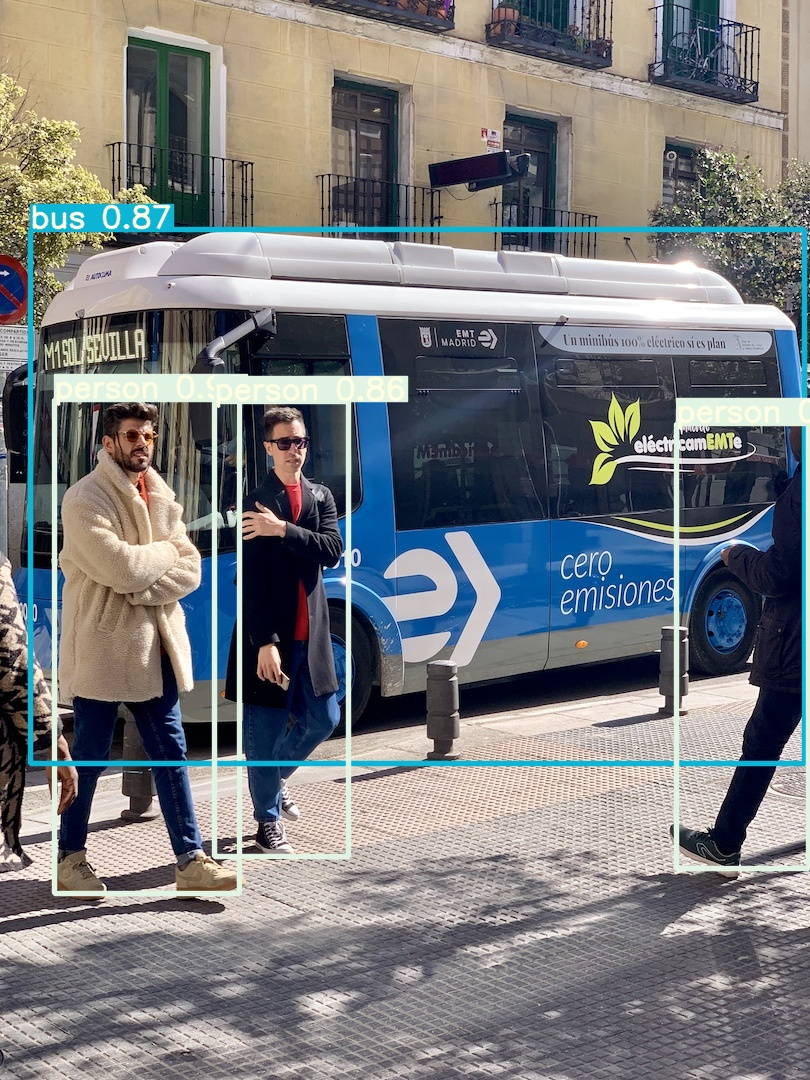

In [10]:
Image(filename='inference/output/bus.jpg', width=600)

#### With fine-tuned weights

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=416, iou_thres=0.5, output='inference/output', save_txt=False, source='inference/images/', update=False, view_img=False, weights=['runs/exp0/weights/best.pt'])
Using CPU

Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 6.61683e+06 gradients
image 1/2 /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/images/bus.jpg: 416x352 3 persons, 1 buss, Done. (0.081s)
image 2/2 /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/images/zidane.jpg: 288x416 2 persons, 1 ties, Done. (0.071s)
Results saved to inference/output
Done. (0.215s)


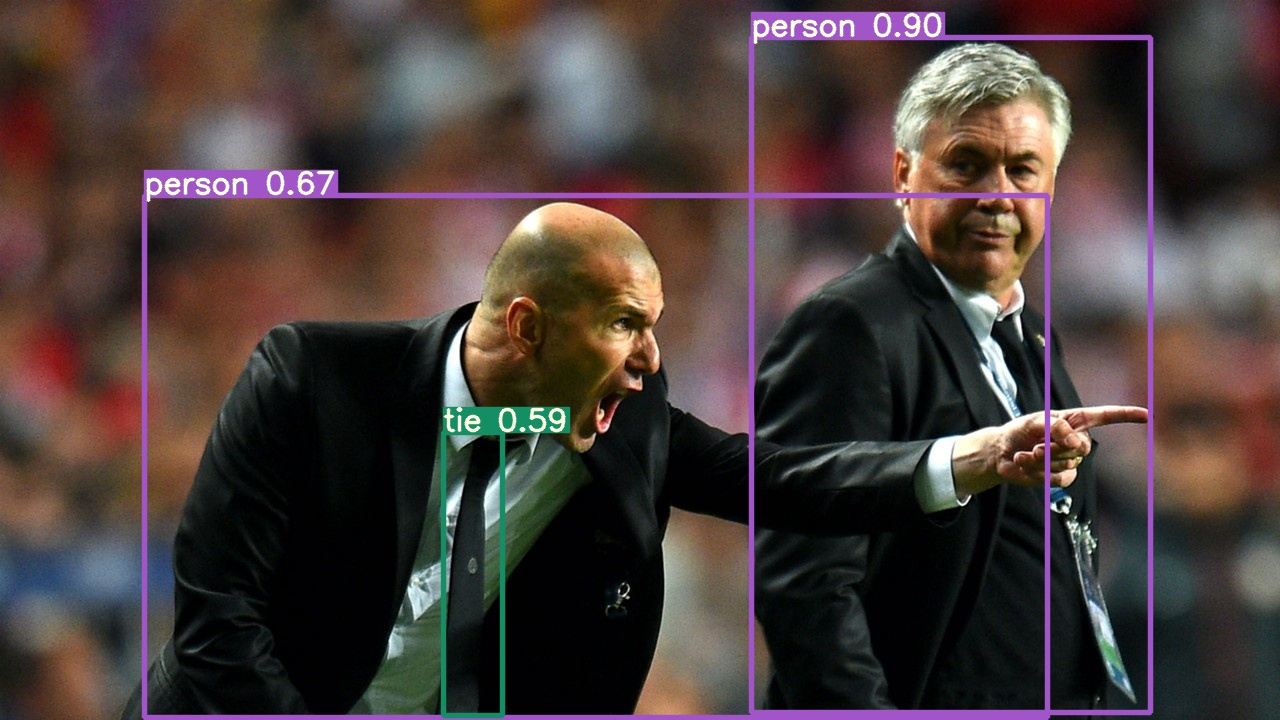

In [11]:
!python detect.py --weights runs/exp0/weights/best.pt --img 416 --conf 0.4 --source inference/images/
Image(filename='inference/output/zidane.jpg', width=600)

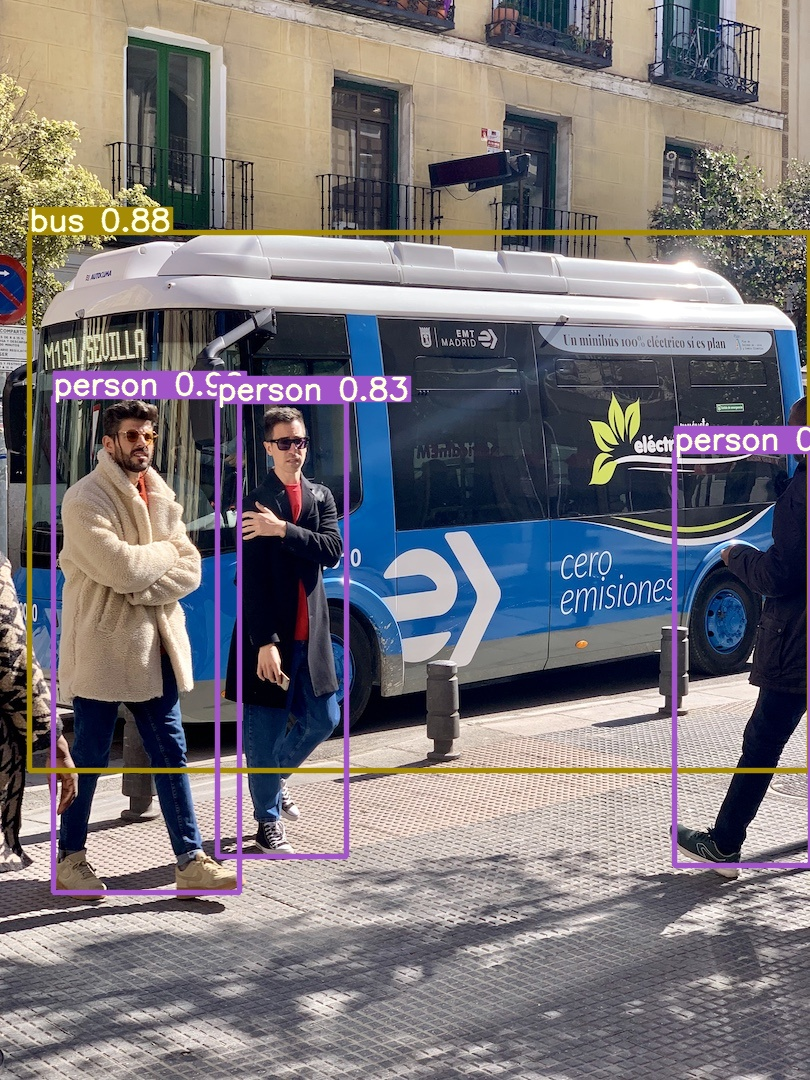

In [12]:
Image(filename='inference/output/bus.jpg', width=600)

#### Example with video

In [13]:
!python detect.py --weights runs/exp0/weights/best.pt --img 640 --conf 0.4 --source inference/videos/street_vid.mp4

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', img_size=640, iou_thres=0.5, output='inference/output', save_txt=False, source='inference/videos/street_vid.mp4', update=False, view_img=False, weights=['runs/exp0/weights/best.pt'])
Using CPU

Fusing layers... Model Summary: 140 layers, 7.45958e+06 parameters, 6.61683e+06 gradients
video 1/1 (1/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.119s)
video 1/1 (2/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.095s)
video 1/1 (3/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.093s)
video 1/1 (4/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.098s)
video 1/1 (5/220) /home/jupyter/tutorials/fast

video 1/1 (54/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.097s)
video 1/1 (55/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.091s)
video 1/1 (56/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.098s)
video 1/1 (57/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.097s)
video 1/1 (58/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 3 cars, Done. (0.097s)
video 1/1 (59/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.087s)
video 1/1 (60/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 38

video 1/1 (109/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.098s)
video 1/1 (110/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, 1 fire hydrants, Done. (0.087s)
video 1/1 (111/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.087s)
video 1/1 (112/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.086s)
video 1/1 (113/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, Done. (0.086s)
video 1/1 (114/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, 1 motorcycles, Done. (0.091s)
video 1/1 (115/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yol

video 1/1 (163/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 1 cars, Done. (0.106s)
video 1/1 (164/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 1 persons, 1 cars, Done. (0.093s)
video 1/1 (165/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 1 cars, 1 trains, Done. (0.101s)
video 1/1 (166/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 1 cars, Done. (0.091s)
video 1/1 (167/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 1 cars, Done. (0.092s)
video 1/1 (168/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 1 persons, 1 cars, Done. (0.098s)
video 1/1 (169/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yol

video 1/1 (214/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 1 cars, 1 motorcycles, 1 trains, Done. (0.087s)
video 1/1 (215/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 1 cars, 1 motorcycles, 1 trains, Done. (0.088s)
video 1/1 (216/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 1 cars, 1 motorcycles, 1 trains, Done. (0.087s)
video 1/1 (217/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, 1 motorcycles, 1 trains, Done. (0.090s)
video 1/1 (218/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 2 cars, 1 motorcycles, 1 trains, Done. (0.088s)
video 1/1 (219/220) /home/jupyter/tutorials/fastai/course-v3/nbs/dl1/YOLO_v5/yolov5/inference/videos/street_vid.mp4: 384x640 1 cars, 1 

### Val2017 dataset model accuracy

In [ ]:
# Download COCO val2017
gdrive_download('1Y6Kou6kEB0ZEMCCpJSKStCor4KAReE43','coco2017val.zip')  # val2017 dataset
!mv ./coco ../  # move folder alongside /yolov5

In [ ]:
# Run YOLOv5s on COCO val2017
!python test.py --weights runs/exp0/weights/best.pty --data coco.yaml --img 672

### test-dev2017 model acurracy

Results are saved to a .json file and can be submitted to the evaluation server at  https://competitions.codalab.org/competitions/20794.

In [ ]:
# Download COCO test-dev2017
gdrive_download('1cXZR_ckHki6nddOmcysCuuJFM--T-Q6L','coco2017labels.zip')  # annotations
!f="test2017.zip" && curl http://images.cocodataset.org/zips/$f -o $f && unzip -q $f && rm $f  # 7GB,  41k images
!mv ./test2017 ./coco/images && mv ./coco ../  # move images into /coco and move /coco alongside /yolov5

In [ ]:
# Run YOLOv5s on COCO test-dev2017 with argument --task test
!python test.py --weights yolov5s.pt --data ./data/coco.yaml --task test